### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left; padding: 0px; border-bottom: 3px solid #294B8E">🚕 Taxi Order Prediction</p>

<a id="1.2"></a>
<div style="padding:20px;
             color:white;
             margin:10;
             font-size:170%;
             text-align:left;
             display:fill;
             border-radius:5px;
             background-color:#294B8E;
             overflow:hidden;
             font-weight:700"><span style='color:#CDA63A'>|</span> Contents</div>

<div class="toc"><ul class="toc-item"><li><span><a href="#data-description" data-toc-modified-id="data-description-1"> <span class="toc-item-num">1&nbsp;&nbsp;</span>Description of data</a></span></li>
     <li><span><a href="#Load-libraries" data-toc-modified-id="Load-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Libraries</a></span></li>
     <li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li>
     <li><span><a href="#data-analysis" data-toc-modified-id="data-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Analysis</a></span></li>
      <li><span><a href="#Creating-features" data-toc-modified-id="Creating-features-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Creating features</a></span></li>
     <li><span><a href="#Prepare-sample-for-model-training" data-toc-modified-id="Prepare-sample-for-model-training-6"><span class="toc -item-num">6&nbsp;&nbsp;</span>Prepare samples for model training</a></span></li>
     <li><span><a href="#Training-Models" data-toc-modified-id="Training-Models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Training Models</a></span></li>
     <li><span><a href="#Model-Comparison" data-toc-modified-id="Model-Comparison-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Comparison</a></span></li>
     <li><span><a href="#Testing-best-model" data-toc-modified-id="Testing-best-model-9"><span class="toc-item-num">9&nbsp; &nbsp;</span>Testing the best model</a></span></li>
     <li><span><a href="#Output" data-toc-modified-id="Output-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Output</a></span></li>

<a id="data-description"></a>
<div style="padding:20px;
             color:white;
             margin:10;
             font-size:170%;
             text-align:left;
             display:fill;
             border-radius:5px;
             background-color:#294B8E;
             overflow:hidden;
             font-weight:700"><span style='color:#CDA63A'>|</span> Data Description</div>

<ul>
<li>num_orders — number of orders</li>
</ul>


<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">


The Clear Taxi company has collected historical data on taxi orders at airports. To attract more drivers during the peak period, you need to predict the number of taxi orders for the next hour.
</div>

<a id="Load-libraries"></a>
<div style="padding:20px;
             color:white;
             margin:10;
             font-size:170%;
             text-align:left;
             display:fill;
             border-radius:5px;
             background-color:#294B8E;
             overflow:hidden;
             font-weight:700"><span style='color:#CDA63A'>|</span> Loading Libraries</div>

In [1]:
import os
import time
import warnings
import pandas as pd
import numpy as np
import catboost as cb
import lightgbm as lgmb
import matplotlib.pyplot as plt 
from sklearn import tree, metrics
from tabulate import tabulate
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from statsmodels.tsa.stattools import adfuller
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import GridSearchCV, train_test_split, TimeSeriesSplit

<a id="EDA"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> EDA</div>

In [2]:
pth1 = '/datasets/taxi.csv'
pth2 = 'taxi.csv'
if os.path.exists(pth1):
    data = pd.read_csv(pth1, index_col=[0], parse_dates=[0])
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, index_col=[0], parse_dates=[0])
else:
    print('Something is wrong')

In [3]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
     There are no gaps in the data. 

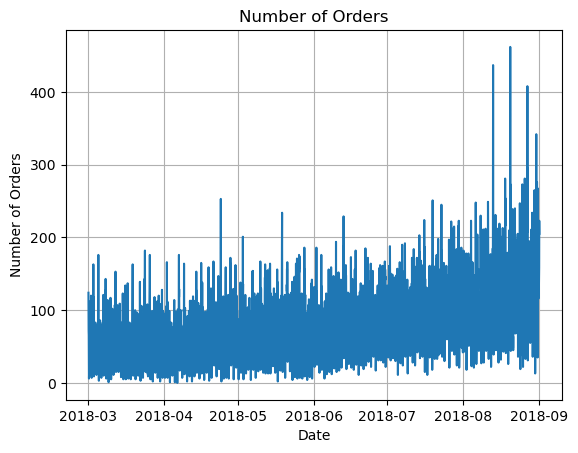

In [5]:
data.sort_index(inplace=True)
data = data.resample('1H').sum()

plt.title("Number of Orders")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.grid()
plt.plot(data['num_orders']); 

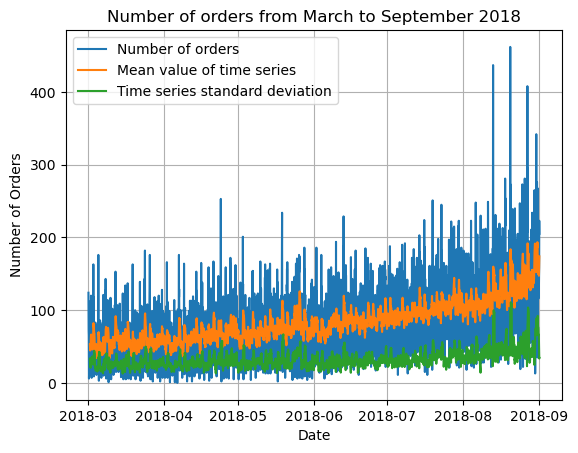

In [6]:
data['mean'] = data['num_orders'].rolling(15).mean()
data['std'] = data['num_orders'].rolling(15).std()
plt.title("Number of orders from March to September 2018")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.grid()
plt.plot(data['num_orders'], label='Number of orders');
plt.plot(data['mean'], label='Mean value of time series');
plt.plot(data['std'], label='Time series standard deviation');
plt.legend();

In [7]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
Let's check whether the time series is stationary, perform the extended Dickey-Fuller test, which uses the following null and alternative hypotheses:
<br>H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant dispersion over time.
<br>H1: The time series is stationary.

In [8]:
p_value = adfuller(data['num_orders'])[1]
print('p=', p_value)
if p_value < 0.05:
     print('Null hypothesis is rejected. Series is stationary by Augmented Dickey-Fuller test')
else:
     print('The null hypothesis is not rejected. The series is non-stationary by the extended Dickey-Fuller test')


p= 0.02894005140261345
Null hypothesis is rejected. Series is stationary by Augmented Dickey-Fuller test


<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
<b>✍ Conclusion</b>
<br>No gaps found in the data. Resampling was carried out for one hour. The time series is stationary.
</div>

<a id="data-analysis"></a>
<div style="padding:20px;
             color:white;
             margin:10;
             font-size:170%;
             text-align:left;
             display:fill;
             border-radius:5px;
             background-color:#294B8E;
             overflow:hidden;
             font-weight:700"><span style='color:#CDA63A'>|</span> Data Analysis</div>

In [9]:
data = data.drop(columns=['mean', 'std'])

In [10]:
decomposed = seasonal_decompose(data)

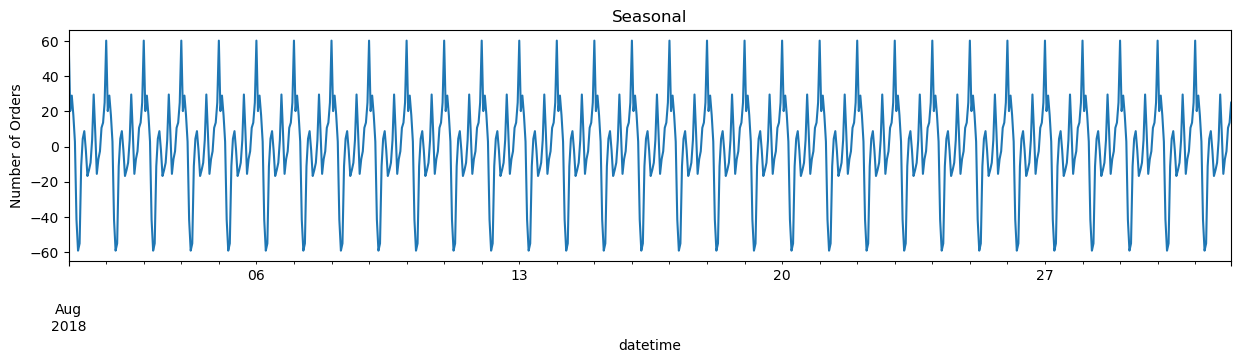

In [11]:
plt.title("Seasonality")
plt.ylabel("Number of Orders")
plt.grid()
decomposed.seasonal['2018-08-01':'2018-08-31'].plot(figsize=(15,3))
plt.title('Seasonal')
plt.show()

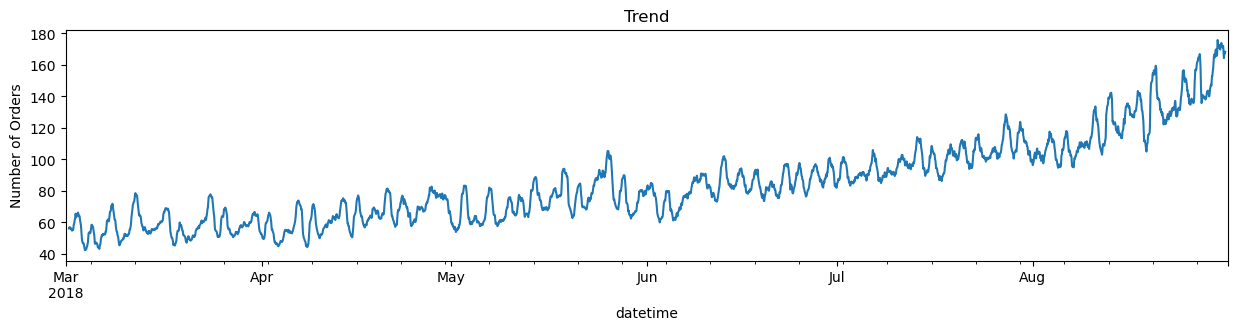

In [12]:
plt.title("Trend")
plt.ylabel("Number of Orders")
plt.grid()
decomposed.trend.plot(figsize=(15,3));

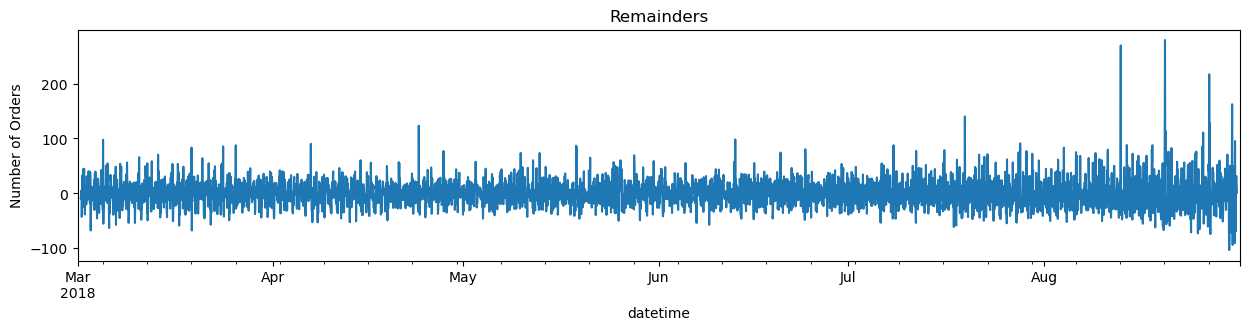

In [13]:
plt.title("Remainders")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.grid()
decomposed.resid.plot(figsize=(15,3));

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

<b>✍ Conclusion</b>
         <ul>
<li>Data is decomposed into three components: seasonality, trend and residual.</li>
<li>The trend shows a linear increase in the number of orders over time.</li>

</ul>
</div> 

<a id="Creating-features"></a>
<div style="padding:20px;
             color:white;
             margin:10;
             font-size:170%;
             text-align:left;
             display:fill;
             border-radius:5px;
             background-color:#294B8E;
             overflow:hidden;
             font-weight:700"><span style='color:#CDA63A'>|</span>Creating Features</div>

In [14]:
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    data_taxi = data
    return data_taxi

In [15]:
data_taxi = make_features(data, 90, 40)

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

<b>✍ Conclusion</b>
         <ul>
<li>Calendar features, lagging values, moving average created. </li>

</ul>
</div>

<a id="Prepare-sample-for-training-models"></a>
<div style="padding:20px;
             color:white;
             margin:10;
             font-size:170%;
             text-align:left;
             display:fill;
             border-radius:5px;
             background-color:#294B8E;
             overflow:hidden;
             font-weight:700"><span style='color:#CDA63A'>|</span> Prepare samples for model training</div>

In [16]:
train, test_1 = train_test_split(data_taxi, shuffle=False, test_size=0.2, random_state=42)
valid, test = train_test_split(test_1, shuffle=False, test_size=0.5, random_state=42)
train = train.dropna()
X_train = train.drop('num_orders', axis=1)
y_train = train['num_orders']
X_valid = valid.drop('num_orders', axis=1)
y_valid = valid['num_orders']
X_test = test.drop('num_orders', axis=1)
y_test = test['num_orders']

In [17]:
print(f"Training sample size: {X_train.shape}")

print(f"Validation sample size: {X_valid.shape}")

print(f"Test sample size: {X_test.shape}")

Training sample size: (3442, 95)
Validation sample size: (442, 95)
Test sample size: (442, 95)


<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

<b>✍ Conclusion</b>
         <ul>
<li>The data is divided into training, validation and test sets.</li>

</ul>
</div>

<a id="Training-models"></a>
<div style="padding:20px;
             color:white;
             margin:10;
             font-size:170%;
             text-align:left;
             display:fill;
             border-radius:5px;
             background-color:#294B8E;
             overflow:hidden;
             font-weight:700"><span style='color:#CDA63A'>|</span> Train Models</div>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">CatBoost</p>

In [18]:
tscv = TimeSeriesSplit(n_splits=4)

In [19]:
# parametrs_Cat = {'depth': [4,7,10],
#                   'learning_rate': [0.03, 0.1, 0.15],
#                   'iterations': [100, 200, 300]
#                }

# cb = cb.CatBoostRegressor(random_state=12345);

# grid_search = GridSearchCV(cb, 
#                             parametrs_Cat, 
#                             cv=tscv,  
#                             n_jobs=-1);

# grid_search.fit(X_train, y_train);

In [20]:
# grid_search.best_params_

In [21]:
# pred = grid_search.best_estimator_.predict(X_valid)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
   To save time, we will use the best hyperparameters.

In [22]:
cb = CatBoostRegressor(random_state=12345, depth=4, learning_rate=0.1, iterations=300);
cb.fit(X_train, y_train);
pred = cb.predict(X_valid)

0:	learn: 34.0447422	total: 64.1ms	remaining: 19.2s
1:	learn: 32.6601485	total: 65.8ms	remaining: 9.81s
2:	learn: 31.4283036	total: 67.3ms	remaining: 6.67s
3:	learn: 30.2076639	total: 68.8ms	remaining: 5.09s
4:	learn: 29.2675555	total: 70.1ms	remaining: 4.14s
5:	learn: 28.4383393	total: 71.5ms	remaining: 3.5s
6:	learn: 27.6764833	total: 72.9ms	remaining: 3.05s
7:	learn: 26.9718765	total: 74.4ms	remaining: 2.71s
8:	learn: 26.4188896	total: 75.8ms	remaining: 2.45s
9:	learn: 25.8355266	total: 77.2ms	remaining: 2.24s
10:	learn: 25.3778609	total: 79.1ms	remaining: 2.08s
11:	learn: 24.9573760	total: 80.8ms	remaining: 1.94s
12:	learn: 24.5965625	total: 82.4ms	remaining: 1.82s
13:	learn: 24.2496351	total: 84.3ms	remaining: 1.72s
14:	learn: 23.9791572	total: 85.8ms	remaining: 1.63s
15:	learn: 23.7060684	total: 88ms	remaining: 1.56s
16:	learn: 23.4912202	total: 89.7ms	remaining: 1.49s
17:	learn: 23.2539583	total: 91.3ms	remaining: 1.43s
18:	learn: 23.0784661	total: 92.9ms	remaining: 1.37s
19:	le

157:	learn: 18.0392282	total: 338ms	remaining: 304ms
158:	learn: 18.0342214	total: 340ms	remaining: 302ms
159:	learn: 18.0017413	total: 342ms	remaining: 299ms
160:	learn: 17.9750583	total: 344ms	remaining: 297ms
161:	learn: 17.9469790	total: 345ms	remaining: 294ms
162:	learn: 17.9264659	total: 347ms	remaining: 292ms
163:	learn: 17.9047647	total: 349ms	remaining: 290ms
164:	learn: 17.8807793	total: 351ms	remaining: 287ms
165:	learn: 17.8553017	total: 354ms	remaining: 286ms
166:	learn: 17.8406638	total: 355ms	remaining: 283ms
167:	learn: 17.8140891	total: 357ms	remaining: 281ms
168:	learn: 17.7891238	total: 359ms	remaining: 278ms
169:	learn: 17.7653046	total: 360ms	remaining: 275ms
170:	learn: 17.7367170	total: 362ms	remaining: 273ms
171:	learn: 17.7159787	total: 364ms	remaining: 271ms
172:	learn: 17.6909059	total: 365ms	remaining: 268ms
173:	learn: 17.6677533	total: 368ms	remaining: 266ms
174:	learn: 17.6489283	total: 369ms	remaining: 264ms
175:	learn: 17.6356244	total: 371ms	remaining:

In [23]:
mse_cat = mean_squared_error(y_valid, pred)
rmse_cat = (mse_cat) ** 0.5
print('RMSE for CatBoost model on validation set: ',rmse_cat)

RMSE for CatBoost model on validation set:  31.07814572129843


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">XGBoost</p>

In [24]:
xgb = XGBRegressor(random_state=12345, learning_rate=0.1, max_depth=35)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=35, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=12345, ...)

In [25]:
preds_xgb= xgb.predict(X_valid)

In [26]:
mse_xgb = mean_squared_error(y_valid, preds_xgb)
rmse_xgb = mse_xgb** 0.5
print('RMSE for XGBoost model on validation set: ', rmse_xgb)

RMSE for XGBoost model on validation set:  34.56975824042725


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">LightGBM</p>

In [27]:
param_light = {'learning_rate': [0.1, 0.3, 0.5, 0.7],
               'max_depth': [15, 20, 30, 35],
              }

lgbm = LGBMRegressor(random_state = 12345)


grid_search = GridSearchCV(estimator = lgbm, 
                            param_grid = param_light, 
                            cv = tscv,
                            n_jobs = -1
                           );
grid_search.fit(X_train, y_train);

In [28]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 15}

In [29]:
preds_lgbm = grid_search.best_estimator_.predict(X_valid)

In [30]:
mse_lgbm = mean_squared_error(y_valid, preds_lgbm)
rmse_lgbm = mse_lgbm** 0.5
print('RMSE for LightGBM model on validation set: ', rmse_lgbm)

RMSE for LightGBM model on validation set:  30.910914961990674


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">DecisionTree</p>

In [31]:
parametrs_DT = {'max_depth': [35, 80]}

DT = DecisionTreeRegressor(random_state=12345)


grid_search = GridSearchCV(DT, 
                             parametrs_DT, 
                             scoring='neg_mean_squared_error', 
                             cv=tscv
                            )
grid_search.fit(X_train, y_train)


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=None),
             estimator=DecisionTreeRegressor(random_state=12345),
             param_grid={'max_depth': [35, 80]},
             scoring='neg_mean_squared_error')

In [32]:
grid_search.best_params_

{'max_depth': 35}

In [33]:
preds_DT = grid_search.best_estimator_.predict(X_valid)

In [34]:
mse_DT = mean_squared_error(y_valid, preds_DT)
rmse_DT = (mse_DT) ** 0.5
print('RMSE for Decision Tree model on validation set: ',rmse_DT)

RMSE for Decision Tree model on validation set:  45.41468058535349


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">RandomForest</p>

In [35]:
# parametrs_RF = {'max_depth': [35, 80],
#                 'n_estimators': [80, 100]}

# RF = RandomForestRegressor(random_state=12345)


# grid_search = GridSearchCV(RF, 
#                               parametrs_RF, 
#                               scoring='neg_mean_squared_error', 
#                               cv=tscv
#                              )
# grid_search.fit(X_train, y_train)


In [36]:
# grid_search.best_params_

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
   To save time, we will use the best hyperparameters.

In [37]:
RF = RandomForestRegressor(random_state=12345, max_depth=35, n_estimators=80)
RF.fit(X_train, y_train)
preds_RF = RF.predict(X_valid)

In [38]:
mse_RF = mean_squared_error(y_valid, preds_RF)
rmse_RF = (mse_RF) ** 0.5
print('RMSE for Random Forest model on validation set: ',rmse_RF)

RMSE for Random Forest model on validation set:  31.984818850164338


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">LinearRegression</p>

In [39]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [40]:
pred_LR = LR.predict(X_valid)

In [41]:
mse_LR = mean_squared_error(y_valid, pred_LR)
rmse_LR = (mse_LR) ** 0.5
print('RMSE for Linear Regression model on validation set: ', rmse LR)

SyntaxError: invalid syntax (730944620.py, line 3)

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">Lasso Regression</p>

In [ ]:
lasso_model = Lasso(alpha=1.0)
lasso=lasso_model.fit(X_train , y_train)

In [ ]:
lasso_predict = lasso.predict(X_valid)

In [ ]:
mse_lasso = mean_squared_error(y_valid, lasso_predict)
rmse_lasso = (mse_lasso) ** 0.5
print('RMSE for Lasso Regression model on validation set: ', rmse lasso)

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">Ridge Regression</p>

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge=ridge_model.fit(X_train , y_train)

In [ ]:
ridge_predict = ridge.predict(X_valid)

In [ ]:
mse_ridge = mean_squared_error(y_valid, ridge_predict)
rmse_ridge = (mse_ridge) ** 0.5
print('RMSE for Ridge Regression model on validation set: ', rmse ridge)

<a id="compare-models"></a>
<div style="padding:20px;
             color:white;
             margin:10;
             font-size:170%;
             text-align:left;
             display:fill;
             border-radius:5px;
             background-color:#294B8E;
             overflow:hidden;
             font-weight:700"><span style='color:#CDA63A'>|</span> Compare Models</div>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left; padding: 0px; border -bottom: 3px solid #294B8E">Assessing the quality of models using the RMSE metric</p>

In [ ]:
data_RMSE={'Models':['XGBoost','LightGBM','CatBoost', 'Decision Tree', 'Random Forest','Linear Regresion', 'Lasso Regresion','Ridge Regresion'],
      'RMSE': [rmse_xgb, rmse_lgbm, rmse_cat, rmse_DT, rmse_RF, rmse_LR, rmse_lasso, rmse_ridge]}
df_RMSE=pd.DataFrame(data_RMSE)
print(tabulate(df_RMSE, headers='keys', tablefmt='psql'))

<div class="alert alert-block alert-info" style="background-color:#FFFAF0;
                                                 color:black;
                                                 border-color:#DEB887;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">

<b>✍ Conclusion</b>
         <ul>
<li>Lasso Regression is the best model because has the lowest RMSE. </li>
<li>Research suggests that Decision Tree has the highest RMSE when tested on a validation set. </li>
<li>XGBoost, Random Forest, LightGBM, CatBoost, Linear Regresion, Ridge Regression performed well because their metric was less than 48. </li>
<li>Let's test the best model on the test set.</li>
</ul>
</div>

<a id="Best-model-testing"></a>
<div style="padding:20px;
             color:white;
             margin:10;
             font-size:170%;
             text-align:left;
             display:fill;
             border-radius:5px;
             background-color:#294B8E;
             overflow:hidden;
             font-weight:700"><span style='color:#CDA63A'>|</span> Testing the best model</div>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">Lasso Regression</p>

In [ ]:
lasso_model = Lasso(alpha=1.0)
lasso=lasso_model.fit(X_train , y_train)

In [ ]:
lasso_final_predict = lasso.predict(X_test)

In [ ]:
mse_final_lasso = mean_squared_error(y_test, lasso_final_predict)
rmse_final_lasso = (mse_final_lasso) ** 0.5
print('RMSE on test set: ', rmse_final_lasso)

In [ ]:
plt.title("Comparison of original and predicted series")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.grid()
plt.plot(np.array(y_test), label='Source Series');
plt.plot(lasso_final_predict, label='Predicted Series');
plt.legend();

<a id="Output"></a>
<div style="padding:20px;
             color:white;
             margin:10;
             font-size:170%;
             text-align:left;
             display:fill;
             border-radius:5px;
             background-color:#294B8E;
             overflow:hidden;
             font-weight:700"><span style='color:#CDA63A'>|</span> Output</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<br>📑A study was conducted to<b> predict taxi orders</b>.
        
        
<br><b> Input data - historical data about taxi orders at airports. </b>

        
<br> 📊 The time series is stationary. The trend shows a linear increase in the number of orders over time.
        
<br> 📊 Linear regression, random forest, decision tree, XGBoost, CatBoost, LightGBM, lasso regression and ridge regression models were trained.
        
<br> 📊 Found the best hyperparameters for the respective models using GridSearchCV.
        
<br> 📊 A comparison of the quality of the studied models using the RMSE metric on the validation set is shown.
 
<br>Based on the analysis, the conclusion is made:
         <br> <b>- the best model with lower RMSE is lasso regression.</b>
<br> <b>- Gradient boosting and Decision Tree models became the worst model. 